In [1]:
# Image compression by HOSVD
# for color image
# 2017, 2018 Tsuyoshi Okubo
# 2019, modified by TO
# 2020, modified by TO

By using the low rank approximation of 3-rank tensor through HOSVD, perform data compression of a color image. 

You can change sample image by modifying file open "sample_color.jpg".

Also, you can set the rank of approximation by varying "chi".

Let's see, how the image changes when you change the rank.

In [2]:
## import libraries
from PIL import Image ## Python Imaging Library
import numpy as np ## numpy
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
## Rank for the low rank approximation
chi = 100

In [4]:
img = Image.open("./sample_color.jpg") ## load image
#img = Image.open("./sample_color2.jpg") ## load image
#img.show(title="Original") ## show image
img.save("./img_original.png") ## save image

In [5]:
array = np.array(img,dtype=float) ## convert to ndarray
print("Array shape:" +repr(array.shape)) ## print array shape

Array shape:(768, 1024, 3)


In [6]:
array_truncated = np.zeros(array.shape)

In [7]:
## hosvd for tensor

## row
matrix = np.reshape(array,(array.shape[0],array.shape[1]*array.shape[2]))
u,s,vt = np.linalg.svd(matrix[:,:],full_matrices=False) ## svd 
    
#truncation
u1 = u[:,:chi]

## column
matrix = np.reshape(np.transpose(array,(1,0,2)),(array.shape[1],array.shape[0]*array.shape[2]))
u,s,vt = np.linalg.svd(matrix[:,:],full_matrices=False) ## svd 
    
#truncation
u2 = u[:,:chi]

## for RGB we do not truncate 
## make projectors
p1 = np.dot(u1,(u1.conj()).T)
p2 = np.dot(u2,(u2.conj()).T)



In [8]:
## make truncated array
array_truncated = np.tensordot(np.tensordot(array,p1,axes=(0,1)),p2,axes=(0,1)).transpose(1,2,0)

normalized_distance = np.sqrt(np.sum((array-array_truncated)**2))/np.sqrt(np.sum(array**2))
print("Low rank approximation by SVD with chi=" +repr(chi))
print("Normalized distance:" +repr(normalized_distance)) ## print normalized distance

Low rank approximation by SVD with chi=100
Normalized distance:0.08782587276005595


In [9]:
img_truncated = Image.fromarray(np.uint8(np.clip(array_truncated,0,255))) ## convert to RGB
#img_truncated.show(title="Truncated") ## show image
img_truncated.save("./img_truncated.png") ## save compressed image
#img_truncated.save("./img_truncated.jpg") ## save compressed image in jpg

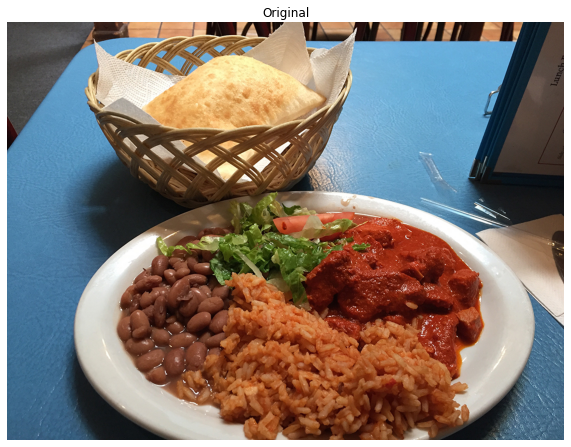

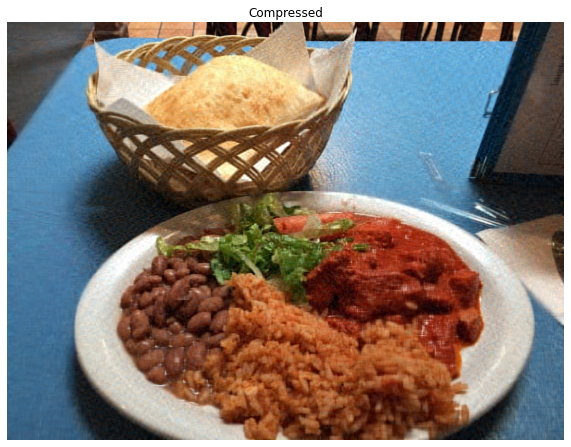

In [10]:
plt.figure(figsize=(array.shape[1]*0.01,array.shape[0]*0.01))
plt.axis("off")
plt.title("Original")
plt.imshow(img)

plt.figure(figsize=(array_truncated.shape[1]*0.01,array_truncated.shape[0]*0.01))
plt.axis("off")
plt.title("Compressed")
plt.imshow(img_truncated)

plt.show()